**Exploring Factors that Influence National Economies Worldwide**

*Fall 2024 Data Science Project*

Defne Demirekler, Ethan Hartz, David Li, Erica Metheny, Jamie Zhao

**Contributions:**

A: Project idea **(Ethan)**

B: Dataset Curation and Preprocessing **(Erica, Ethan, Jamie)**

C: Data Exploration and Summary Statistics **(Erica, David, Jamie, Ethan)**

D: ML Algorithm Design/Development **(Erica, David, Jamie)**

E: ML Algorithm Training and Test Data Analysis **(Erica, David, Jamie, Ethan)**

F: Visualization, Result Analysis, Conclusion **(Defne)**

G: Final Tutorial Report Creation **(Erica, Defne, Jamie)**

H: Additional (not listed above)

**Jamie:** I gathered and cleaned raw data, then created visualizations to identify trends. I also analyzed the data to select the most suitable machine learning model for the task.

**Ethan:** I came up with the project idea, aided Jamie in gathering and cleaning said data, and I provided assistance in getting the machine learning model up in running. I was directly involved with data analysis and exploration of the resource rent of a country in relation to a country's GDP & GDPPC.

**David:** I assisted with understanding and coding the primary data analysis / machine learning models and wrote explanations for the primary data analysis code. I also used the knowledge gained from working in primary data analysis to write the insights and conclusions section.

**Defne:** I coded the visualization section of our project, creating histograms to summarize and help us draw conclusions from our machine learning models, and helped debug the exploratory analysis. Additionally, I wrote the descriptions and explanations of the data curation, exploratory analysis, and visualization sections.

**Erica**: I contributed by writing the Introduction and finding Conclusion 3 in the Exploratory Data Analysis. With the help of others' preprocessing, I also helped design, evaluate, and explain the ML models.


# **Introduction**

When a country transitions from a developing economy to an emerging economy and eventually to a developed economy, its unique characteristics begin to evolve. For instance, developed countries tend to exhibit higher literacy rates and lower child mortality rates compared to developing countries. Often, these changes are the result of increased population size, increased gross domestic product (GDP), and increased access to social services such as education and healthcare. The relationships between these variables are the foundation for development economics and are important to study as they give insight into how a country can increase its quality of life. Our analysis explores the key indicators that shape and reflect a country's development journey.

In addition to social markers of change, our dataset from the [World Bank](https://databank.worldbank.org/source/world-development-indicators#) emphasizes a country's agricultural features and its usage of natural resources from 2010 to 2021. By comparing countries from every stage of economic growth, we can begin to understand how properties such as arable land (ii), natural resource rents (iii), and renewable energy usage influence a country's development. With our analysis, we try to answer the following questions:

*   Do developed countries consume more renewable energy than developing countries?
*   Does a country's percentage of arable land influence its GDP?
*   What economy ‚Äî developing, emerging, or developed ‚Äî obtains the largest natural resource rents?
*   Can we predict a country's GDP from its consumption of nonrenewable energy?
*   Is it economcially advantageous for a country to be environmentally friendly?

Answering these questions is important as it provides evidence for advocating that countries enforce environmentally conscious policies. Moreover, it helps policy advisors to make informed and effective recommendations. By implementing strong policies, countries build stronger economies and stronger communities.

(i) **gross domestic product (GDP)**: a measure of the total value of goods and services produced within a country's borders over a specific period of time

(ii) **arable land**: land that can be plowed and used to grow crops or raise livestock

(iii) **natural resource rent**: the economic value of a natural resource that is generated from extracting it, minus the cost of extraction


**Additional Resourses**



*   https://www.worldbank.org/en/topic/environment/publication/environment-strategy-toward-clean-green-resilient-world
*   https://www.developmentaid.org/news-stream/post/154288/how-do-developed-countries-differ-from-the-developing-ones
*   https://wdi.worldbank.org/tables
*   https://datacatalog.worldbank.org/search/dataset/0037712/World-Development-Indicators


# **Data Curation**

We were initially interested in exploring agriculture, energy, renewables, and sustainability topics. We narrowed down our scope to renewable energy consumption. Specifically, we wanted to look at the ways in which different countries interact with these parts of the economy. This meant that we needed a dataset that contained comprehensive information about all countries. We found our data from DataBank offered by World Bank Group (https://databank.worldbank.org/).

Using the built-in filtering tools offered by the website, we chose specific features that would be relevant to our topic in the dataset. We downloaded data detailing several features of all countries from the years 1960-2023. The data is reported yearly.
These features include, but aren't limited to:

Arable land (% of land area)
Total natural resources rents (% of GDP)
Renewable energy consumption (% of total final energy consumption)
GDP (in USD)
GDP per capita (in USD)
This dataset was saved in worldbank_data.csv.

Now that we've detailed the origins of our dataset, we begin cleaning and processing. The first step is to import necessary libraries.

In [ ]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import ttest_ind
from scipy.stats import f_oneway
from scipy.stats import pearsonr
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from torch.utils.data import DataLoader, TensorDataset
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim


from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


The dataset denotes missing data with '..' \\
Imports the World Bank dataset CSV file and fills missing entries

In [ ]:
df = pd.read_csv("worldbank_data.csv")
df.replace('..', None, inplace=True)

In [ ]:
# Shows the 25 countries in the data set
df['Country Name'].unique()

array(['Germany', 'Haiti', 'United States', 'Brazil', 'China',
       'Russian Federation', 'Japan', 'India', 'United Kingdom', 'France',
       'Italy', 'Canada', 'Mexico', 'Australia', 'Korea, Rep.', 'Spain',
       'Indonesia', 'Netherlands', 'Turkiye', 'Saudi Arabia',
       'Switzerland', 'Poland', 'Belgium', 'Sweden', 'Argentina'],
      dtype=object)

Identifies each Series Name and their associated Series Codes

In [ ]:
# Identifies each Series Name and their associated Series Codes
series_identifiers = df[['Series Name', 'Series Code']].drop_duplicates()
series_identifiers

Series Name        Series Code
0   Adjusted savings: net forest depletion (% of GNI)  NY.ADJ.DFOR.GN.ZS
1   Adjusted savings: net forest depletion (curren...     NY.ADJ.DFOR.CD
2   Agriculture, forestry, and fishing, value adde...     NV.AGR.TOTL.ZS
3   Agriculture, forestry, and fishing, value adde...  NV.AGR.TOTL.KD.ZG
4   Agriculture, forestry, and fishing, value adde...     NV.AGR.TOTL.CD
..                                                ...                ...
61                 Rural population growth (annual %)     SP.RUR.TOTL.ZG
62           Urban population (% of total population)  SP.URB.TOTL.IN.ZS
63                                   Urban population        SP.URB.TOTL
64                 Urban population growth (annual %)        SP.URB.GROW
65  Water productivity, total (constant 2015 US$ G...  ER.GDP.FWTL.M3.KD

[66 rows x 2 columns]

In [ ]:
# Each unique Series Name
series_identifiers['Series Name'].unique()

array(['Adjusted savings: net forest depletion (% of GNI)',
       'Adjusted savings: net forest depletion (current US$)',
       'Agriculture, forestry, and fishing, value added (% of GDP)',
       'Agriculture, forestry, and fishing, value added (annual % growth)',
       'Agriculture, forestry, and fishing, value added (current US$)',
       'Agriculture, forestry, and fishing, value added per worker (constant 2015 US$)',
       'Forest area (% of land area)', 'Forest area (sq. km)',
       'Forest rents (% of GDP)',
       'Access to electricity, rural (% of rural population)',
       'Rural land area (sq. km)', 'Rural population',
       'Rural population (% of total population)',
       'PM2.5 air pollution, mean annual exposure (micrograms per cubic meter)',
       'PM2.5 air pollution, population exposed to levels exceeding WHO guideline value (% of total)',
       'PM2.5 pollution, population exposed to levels exceeding WHO Interim Target-1 value (% of total)',
       'PM2.5 p

# **Exploratory Data Analysis**

**Arable Land Test** \\

Arable land is the land in an area solely devoted to crop growth and production. We want to analyze the relationship between a country's GDP per capita and the amount of arable land it contains as a percentage of entire land mass. Arable land impacts GDP as agriculutral productivity may boost a country's GDP.

We are conducting an ANOVA test. Our research question, hypotheses, and setup are as follows:
Does available farmland (Arable Land) impact a country's GDP?

ùõº=0.05

Null hypothesis: Available arable land has no effect on a country's GDP

Alternative hypothesis: Available arable does have an effect on a country's GDP

First, we extract relevant fields to our test: Arable land %, GDP, and GDP per capita. We filter the data and handle NA values.


In [ ]:
arable_code = series_identifiers.loc[series_identifiers['Series Name'] == 'Arable land (% of land area)', 'Series Code'].iloc[0]
gdp_code = series_identifiers.loc[series_identifiers['Series Name'] == 'GDP (current US$)', 'Series Code'].iloc[0]
gdppc_code = series_identifiers.loc[series_identifiers['Series Name'] == 'GDP per capita (current US$)', 'Series Code'].iloc[0]

conclusion1_df = df[(df['Series Code'] == arable_code) | (df['Series Code'] == gdp_code) | (df['Series Code'] == gdppc_code)]
print(conclusion1_df.head())

   Country Name Country Code                   Series Name     Series Code  \
19      Germany          DEU  GDP per capita (current US$)  NY.GDP.PCAP.CD   
24      Germany          DEU  Arable land (% of land area)  AG.LND.ARBL.ZS   
47      Germany          DEU             GDP (current US$)  NY.GDP.MKTP.CD   
85        Haiti          HTI  GDP per capita (current US$)  NY.GDP.PCAP.CD   
90        Haiti          HTI  Arable land (% of land area)  AG.LND.ARBL.ZS   

       1960 [YR1960]     1961 [YR1961]     1962 [YR1962]     1963 [YR1963]  \
19  1157.88046394509  1311.10429752935  1425.29899158165   1496.6710747788   
24              None   35.001288918168  34.9010397273222  34.8437544754103   
47  84310950194.1152  96205728657.7269  105508875286.241  111822811005.912   
85  70.0275483647212  68.1938366775398   69.612673552119  71.5344010324434   
90              None   32.656023222061   32.656023222061   32.656023222061   

       1964 [YR1964]     1965 [YR1965]  ...     2014 [YR2014] 

Next, we group data by country to be able to do a larger global comparison. We create 3 categories to classify arable land: low, medium, and high. We decided on these thresholds by observing common trends in data as well as external research about arable land as a percentage of total land.
The GDP data is stored within each of these categories in a dictionary called gdp_data.

In [ ]:
groups = conclusion1_df.groupby('Country Name')
anova_results = {
    'low_arable': [],
    'medium_arable': [],
    'high_arable': []
}

gdp_data = {
    'low_arable': [],
    'medium_arable': [],
    'high_arable': []
}

# Iterate through each country, clean data, and classify based on arable land
for country, group in groups:
    arable_land_2021 = group['2021 [YR2021]'].iloc[1]
    arable_land_2021 = float(arable_land_2021)

    # Classify based on arable land categories
    if arable_land_2021 < 10:
        category = 'low_arable'
    elif 10 <= arable_land_2021 < 20:
        category = 'medium_arable'
    elif arable_land_2021 > 30:
        category = 'high_arable'
    else:
        continue  # Skip countries that don't fall into the specific ranges

    # Collect GDP data for ANOVA
    gdp_value = group['2021 [YR2021]'][group['Series Code'] == gdppc_code].iloc[0]
    gdp_value = float(gdp_value)
    gdp_data[category].append(gdp_value)

Finally, we display the GDP data for each of the arable categories. We displayed all the gdp data for different arable levels, as well as some summary statistics. The mean is skewed by outlier data, as it varies significantly from median GDP per capita.
Looking at median, we observe that the countries with highest median GDP per capita have the most arable land, followed by countries with low arable land %, then finally countries with medium arable land %. However, this variation is small and may not be significant. We continue with our ANOVA test.

In [ ]:
# Display categories
for category, values in gdp_data.items():
    if values:  # Ensure there are values in the list to avoid errors
        mean_gdp = np.mean(values)
        median_gdp = np.median(values)
        print(f"\nGDP data for {category}: {values}")
        print(f"Mean GDP per capita for {category}: {mean_gdp}")
        print(f"Median GDP per capita for {category}: {median_gdp}")
    else:
        print(f"\nNo GDP data for {category}")


GDP data for low_arable: [60697.2454358579, 7794.88097933152, 52496.8441693242, 12521.5224609375, 24315.6153272971, 61417.6808766469]
Mean GDP per capita for low_arable: 36540.631541565854
Median GDP per capita for low_arable: 38406.22974831065

GDP data for medium_arable: [10650.8604604345, 12617.5051041181, 4334.23145407913, 40058.5373276179, 35125.5224984723, 10363.1927221972, 93446.4344518943, 71055.8761938303]
Mean GDP per capita for medium_arable: 34706.52002658047
Median GDP per capita for medium_arable: 23871.5138012952

GDP data for high_arable: [43671.3084099631, 51426.7503654421, 1823.74222445285, 2250.1790176424, 18050.2778862996]
Mean GDP per capita for high_arable: 23444.45158076001
Median GDP per capita for high_arable: 18050.2778862996


Let's plot our data! \\
We notice visually there doesn't seem to be meaningful differences in GDP per capita depending on the arable land of a country. There appear to be several outliers, some that may contribute to skewing in the data.

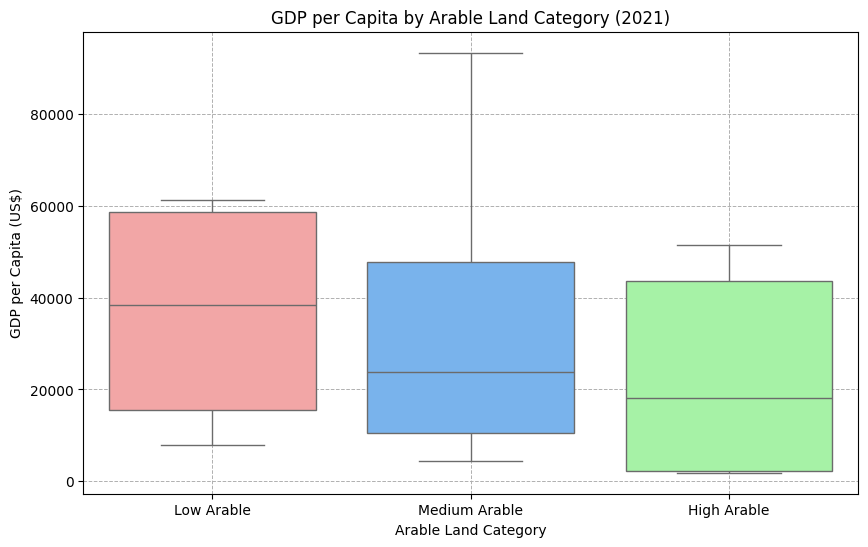

In [ ]:
# Plot each category as a boxplot
arable_data = pd.DataFrame({
    'Arable Land Category': ['Low Arable'] * len(gdp_data['low_arable']) +
                           ['Medium Arable'] * len(gdp_data['medium_arable']) +
                           ['High Arable'] * len(gdp_data['high_arable']),
    'GDP per Capita': gdp_data['low_arable'] + gdp_data['medium_arable'] + gdp_data['high_arable']
})

colors = ['#FF9999', '#66B3FF', '#99FF99']

plt.figure(figsize=(10, 6))
sns.boxplot(x='Arable Land Category', y='GDP per Capita', data=arable_data, hue='Arable Land Category', palette=colors)
plt.title('GDP per Capita by Arable Land Category (2021)')
plt.ylabel('GDP per Capita (US$)')
plt.xlabel('Arable Land Category')
plt.grid(True, which='both', linestyle='--', linewidth=0.7)

plt.show()

Finally, we perform our ANOVA test to determine if our findings are statisticaly significant. \\
From the ANOVA test we find that the p-value is around 0.7107 > .05 (alpha), so we fail to reject the null hypothesis. \\

Analyzing the results, we can conclude that the arable land percentage does not have a relationship with the GDP of a country.

In [ ]:
# Perform ANOVA test
f_statistic, p_value = f_oneway(gdp_data['low_arable'], gdp_data['medium_arable'], gdp_data['high_arable'])

# Display ANOVA results
print("\nANOVA results:")
print(f"F-statistic = {f_statistic}, p-value = {p_value}")


ANOVA results:
F-statistic = 0.3488171316761106, p-value = 0.710755627942138


**Natural Resource Rent Test** \\


Natural resource rents are the profits generated from extracting natural resources such as oil, gas, minerals, timber, and land. Since it refers to profitable extractions, the return must be greater than the cost (i.e. labor, material, resources, etc) to do the physical extraction. \\
We are specifically looking at natural resource rents as a percentage of GDP, meaning the amount of money that resource extraction contibutes to a country's economy. This helps us understand the GDP of countries that heavily rely on producing their own natural resources compared to countries that are reliant on importing their resources.

We are conducting a two-tailed t-test. Our research question, hypotheses, and setup are as follows: \\
Does a country's total natural resources rent increase or decrease a country's GDP?

$\alpha = 0.05$

Null Hypothesis: A country's total natural resources rents has no effect on the countries GDP.

Alternative Hypothesis: A country's total natural resources rents increase or decrease (has an effect on) a country's GDP.

First, we filter the dataset to extract relevant features like resource rents as a percentage of GDP, GDP, and GDP per capita. We then group by country. Then we process each country's data by applying processes like removing NA values, converting data types, renaming columns, and transposing data layout for convenience. \\
Similar to our arable land test, we divide country GDP per capitas into low and high natural resource rent groups.

In [ ]:
# CONSIDER: GDP vs. GDP per Capita
# Below, we reject the Null Hypothesis for both GDP and GDP per Captia.

resource_code = series_identifiers.loc[series_identifiers['Series Name'] == 'Total natural resources rents (% of GDP)', 'Series Code'].iloc[0]
gdp_code = series_identifiers.loc[series_identifiers['Series Name'] == 'GDP (current US$)', 'Series Code'].iloc[0]
gdppc_code = series_identifiers.loc[series_identifiers['Series Name'] == 'GDP per capita (current US$)', 'Series Code'].iloc[0]

conclusion2_df = df[(df['Series Code'] == resource_code) | (df['Series Code'] == gdp_code) | (df['Series Code'] == gdppc_code)]
groups = conclusion2_df.groupby('Country Name')

all_countries_df = pd.DataFrame()

# Combine all entries for Natural Resources Rents, GDP, and GDPCC
for country, group in groups:
  country = groups.get_group(country).transpose()
  country_cleaned = country.dropna()
  country_cleaned = country_cleaned.drop(index=['Country Name', 'Country Code', 'Series Name', 'Series Code'])
  country_cleaned.columns = ['GDPPC', 'Natural Resource Rents % of GDP', 'GDP']
  country_cleaned['GDPPC'] = pd.to_numeric(country_cleaned['GDPPC'], errors='coerce')
  country_cleaned['GDP'] = pd.to_numeric(country_cleaned['GDP'], errors='coerce')
  country_cleaned['Natural Resource Rents % of GDP'] = pd.to_numeric(country_cleaned['Natural Resource Rents % of GDP'], errors='coerce')
  all_countries_df = pd.concat([all_countries_df, country_cleaned], ignore_index=True)

# Divide into two samples - high (>= 10) natural resources rents percentage of GDP and low (< 10) natural resources rents percentage of GDP
low_resource_df = all_countries_df[all_countries_df['Natural Resource Rents % of GDP'] <= 10.0]
high_resource_df = all_countries_df[all_countries_df['Natural Resource Rents % of GDP'] > 10.0]

low_resource_df, high_resource_df

(             GDPPC  Natural Resource Rents % of GDP           GDP
 0      3727.048010                         3.273530  1.094900e+11
 1      3787.470679                         4.118584  1.129886e+11
 2      2919.283511                         3.364516  8.841667e+10
 3      3454.296334                         1.249136  1.062138e+11
 4      3492.691474                         1.806467  1.090294e+11
 ...            ...                              ...           ...
 1215  60322.261424                         0.427546  1.961210e+13
 1216  63201.045848                         0.595679  2.065652e+13
 1217  65548.070785                         0.557098  2.152140e+13
 1218  64317.398913                         0.329506  2.132295e+13
 1219  71055.876194                         1.279944  2.359403e+13
 
 [1118 rows x 3 columns],
             GDPPC  Natural Resource Rents % of GDP           GDP
 90   60697.245436                        13.357875  1.559034e+12
 236    156.396389                  

In [ ]:
# Summary statistics for low resource rent countries
low_resource_stats = low_resource_df.describe()

# Summary statistics for high resource rent countries
high_resource_stats = high_resource_df.describe()

Similar to our arable land test, we divide country GDP per capitas into low and high natural resource rent groups.

In [ ]:
# Determine p-value for GDP
t_stat, p_value = ttest_ind(low_resource_df['GDP'], high_resource_df['GDP'])
t_stat, p_value

(3.5233368333894464, 0.00044193173068692346)

Since the p-value < 0.05 we reject the Null Hypothesis that resource rents do not affect GDP, and say that resource rents do affect GDP.

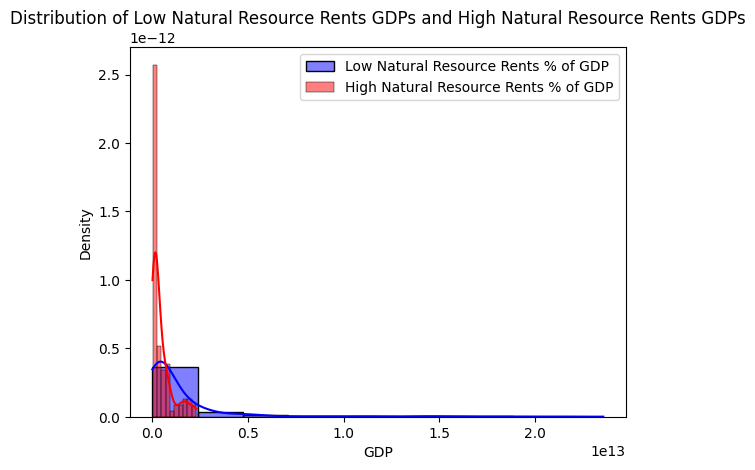

In [ ]:
# Plot Low Resource Rent GDPs against High Resource Rent GDPs
sns.histplot(low_resource_df['GDP'], color='blue', label='Low Natural Resource Rents % of GDP', kde=True, stat="density", bins=10)
sns.histplot(high_resource_df['GDP'], color='red', label='High Natural Resource Rents % of GDP', kde=True, stat="density", bins=10)

plt.title(f'Distribution of Low Natural Resource Rents GDPs and High Natural Resource Rents GDPs')
plt.xlabel('GDP')
plt.ylabel('Density')
plt.legend()

plt.show()

In [ ]:
# Determine p-value for GDPPC
t_stat, p_value = ttest_ind(low_resource_df['GDPPC'], high_resource_df['GDPPC'])
t_stat, p_value

(5.416354665640033, 7.32318080735619e-08)

Since the p-value < 0.05 we reject the Null Hypothesis that resource rents do not affect GDPPC, and say that resource rents do affect GDPPC.

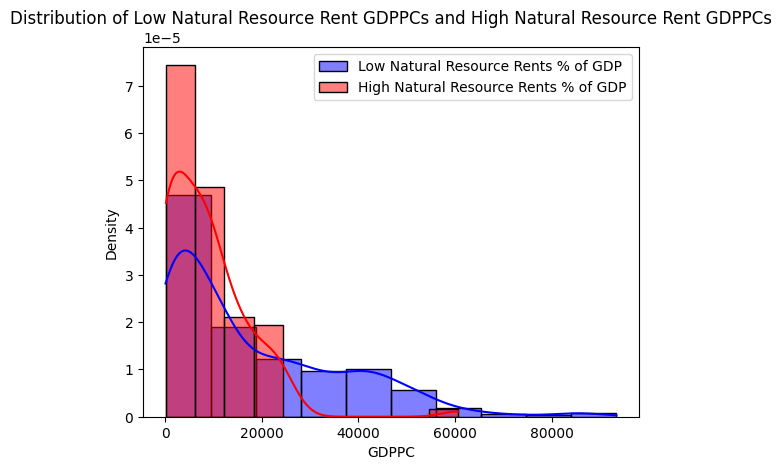

In [ ]:
# Plot Low Resource Rent GDPPCs against High Resource Rent GDPPCs
sns.histplot(low_resource_df['GDPPC'], color='blue', label='Low Natural Resource Rents % of GDP', kde=True, stat="density", bins=10)
sns.histplot(high_resource_df['GDPPC'], color='red', label='High Natural Resource Rents % of GDP', kde=True, stat="density", bins=10)

plt.title(f'Distribution of Low Natural Resource Rent GDPPCs and High Natural Resource Rent GDPPCs')
plt.xlabel('GDPPC')
plt.ylabel('Density')
plt.legend()

plt.show()

**CONCLUSION 3**

Renewable energy consumption is another signifcant development indicator for a country especially in proportion to its economic position. In particular, we are going to look at the renewable energy consumption as a percentage of the total energy consumption of a particular country. This helps us understand if the is a relationship between a nation's wealth and their reliance on advancements in green technology.

Here we are going to run a Pearson's correlation test to verify if there is a relationship between GDP and renewable energy consumption

We start with an inital hypothesis of:

Hypothesis: As a country's renewable energy consumption increases, a country's GDP increases.

First we start by extracting the relevant features from the dataset and group them by country, dropping any empty values.

In [ ]:
renew_code = series_identifiers.loc[series_identifiers['Series Name'] == 'Renewable energy consumption (% of total final energy consumption)', 'Series Code'].iloc[0]
gdp_code = series_identifiers.loc[series_identifiers['Series Name'] == 'GDP (current US$)', 'Series Code'].iloc[0]
gdppc_code = series_identifiers.loc[series_identifiers['Series Name'] == 'GDP per capita (current US$)', 'Series Code'].iloc[0]

conclusion3_df = df[(df['Series Code'] == renew_code) | (df['Series Code'] == gdp_code) | (df['Series Code'] == gdppc_code)]
groups = conclusion3_df.groupby('Country Name')

# Combine all entries for Renewable Energy Consumption, GDP, and GDPCC
all_countries_df = pd.DataFrame()
for country_name, group_df in groups:
  country = groups.get_group(country_name).transpose()
  country_cleaned = country.dropna()
  country_cleaned = country_cleaned.drop(index=['Country Name', 'Country Code', 'Series Name', 'Series Code'])
  country_cleaned.columns = ['GDPPC', 'GDP', 'Renewable Energy Consumption']
  country_cleaned['GDPPC'] = pd.to_numeric(country_cleaned['GDPPC'], errors='coerce')
  country_cleaned['GDP'] = pd.to_numeric(country_cleaned['GDP'], errors='coerce')
  country_cleaned['Renewable Energy Consumption'] = pd.to_numeric(country_cleaned['Renewable Energy Consumption'], errors='coerce')
  all_countries_df = pd.concat([all_countries_df, country_cleaned], ignore_index=True)

all_countries_df

GDPPC           GDP  Renewable Energy Consumption
0     4330.968191  1.413527e+11                           8.6
1     5730.723810  1.897200e+11                           8.4
2     6815.329330  2.287789e+11                           9.0
3     6957.417499  2.367417e+11                           9.7
4     7464.474737  2.574400e+11                          10.0
..            ...           ...                           ...
795  60322.261424  1.961210e+13                           9.7
796  63201.045848  2.065652e+13                           9.9
797  65548.070785  2.152140e+13                          10.2
798  64317.398913  2.132295e+13                          11.0
799  71055.876194  2.359403e+13                          10.9

[800 rows x 3 columns]

Next, we create a scatterplot of GDP and renewable energy consumption

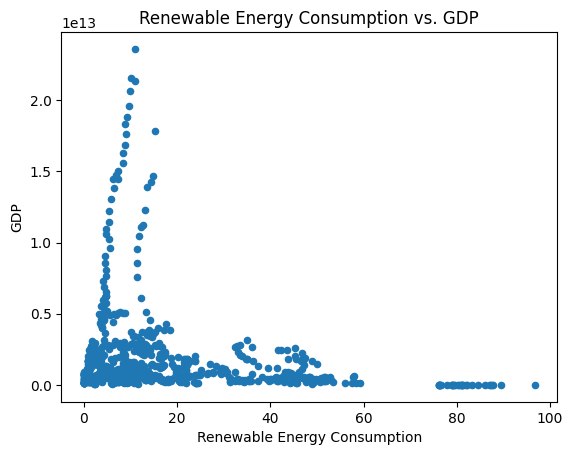

In [ ]:
# Plot Renewable Energy Consumption against GDP
all_countries_df.plot(x='Renewable Energy Consumption', y='GDP', kind='scatter')
plt.title('Renewable Energy Consumption vs. GDP')
plt.show()

After running a Pearson's correlation test, we find that it outputs a value of about -0.185, which indicates that there is a weak negative trend between GDP and renewable energy consumption

In [ ]:
# Determine Pearson Correlation Coefficient (-1 < r < 1)
gdp_pearson_corr = all_countries_df['GDP'].corr(all_countries_df['Renewable Energy Consumption'], method='pearson')
gdp_pearson_corr

-0.1850711506638351

Next, we create a scatterplot of GDPPC and renewable energy consumption

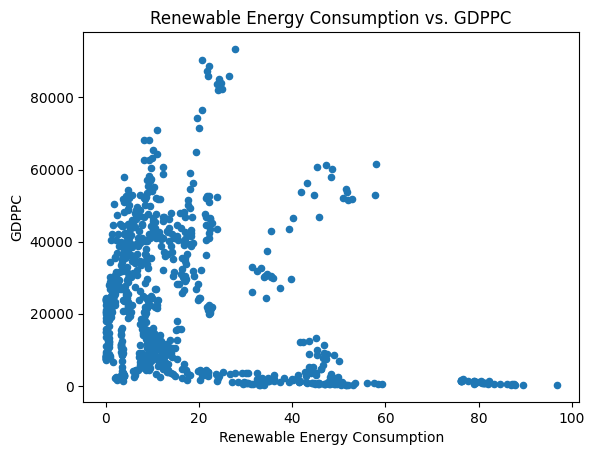

In [ ]:
# Plot Renewable Energy Consumption against GDPPC
all_countries_df.plot(x='Renewable Energy Consumption', y='GDPPC', kind='scatter')
plt.title('Renewable Energy Consumption vs. GDPPC')
plt.show()

After running a Pearson's correlation test, we find that it outputs a value of about -0.276, which indicates that there is a weak negative trend between GDPPC and renewable energy consumption

In [ ]:
# Determine Pearson Correlation Coefficient (-1 < r < 1)
gdppc_pearson_corr = all_countries_df['GDPPC'].corr(all_countries_df['Renewable Energy Consumption'], method='pearson')
gdppc_pearson_corr

-0.2759433675238319

# **Primary Analysis**

We found the observed negative correlation between economic power and renewable energy consumption particularly intriguing. Intuitively, one might expect wealthier nations to leverage their greater financial resources and purchasing power to adopt renewable energy technologies, which are often more expensive and cutting-edge compared to fossil fuels. Surprisingly, the data indicates otherwise. This unexpected trend prompted us to delve deeper into modeling the exact relationship between the two variables.

While our exploratory dataset included a plethora of world development indicators over 50 years, it only did so for 25 countries. Since we wanted to look specifically at the relationships between GDP, GDPPC, and renewable energy consumption, we decided we needed more data. Luckily, the World Bank provides a
[dataset](https://databank.worldbank.org/metadataglossary/world-development-indicators/series/EG.FEC.RNEW.ZS) only on renewable energy consumption for more than 250 countries and regions.

**In this section, we perform various machine learning models, including linear regression, polynomial regression, and logarithmic regression. This will allow us to create models which can predict of a country's renewable energy usage given its GDP or GDPPC.**

Read in the csv and replace the given '..' values with None.

In [ ]:
# Load in World Bank renewable energy dataset with additional countries
renew_df = pd.read_csv("worldbank_renew.csv")

In [ ]:
# Lists all the countries/regions in the data set
renew_df['Country Name'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'American Samoa', 'Andorra',
       'Angola', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas, The', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bermuda', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina',
       'Botswana', 'Brazil', 'British Virgin Islands',
       'Brunei Darussalam', 'Bulgaria', 'Burkina Faso', 'Burundi',
       'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada', 'Cayman Islands',
       'Central African Republic', 'Chad', 'Channel Islands', 'Chile',
       'China', 'Colombia', 'Comoros', 'Congo, Dem. Rep.', 'Congo, Rep.',
       'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Curacao',
       'Cyprus', 'Czechia', 'Denmark', 'Djibouti', 'Dominica',
       'Dominican Republic', 'Ecuador', 'Egypt, Arab Rep.', 'El Salvador',
       'Equatorial Guinea', 'Eritrea', 'Estonia', 'Eswatini', 'Ethiopia',
       'Faroe Islands',

In [ ]:
# Identifies each Series Name and their associated Series Codes
renew_series_identifiers = renew_df[['Series Name', 'Series Code']].drop_duplicates()
renew_series_identifiers

Series Name     Series Code
0                                  GDP (current US$)  NY.GDP.MKTP.CD
1                       GDP per capita (current US$)  NY.GDP.PCAP.CD
2  Renewable energy consumption (% of total final...  EG.FEC.RNEW.ZS

The following code cleans the data by grouping the data by country, sorting for the years that we want, converting the columns to numerical values, using mean imputation on missing values, removing the top 5% and 95% to minimize outliers, and storing this newly sorted dataset in a new dataframe.

In [ ]:
# Filter for relevant Series Codes
renew_analysis_df = renew_df[(renew_df['Series Code'] == renew_code) |
                    (renew_df['Series Code'] == gdp_code) |
                    (renew_df['Series Code'] == gdppc_code)]

# Group by country
groups = renew_analysis_df.groupby('Country Name')

# Combine all entries for Renewable Energy Consumption, GDP, and GDPPC
all_countries_df = pd.DataFrame()
for country_name, group_df in groups:
    country = group_df.transpose()
    country_cleaned = country.drop(index=['Country Name', 'Country Code', 'Series Name', 'Series Code'], errors='ignore')
    country_cleaned.columns = ['GDP', 'GDPPC', 'Renewable Energy Consumption']

    # Filter for years 2010-2020
    years = [f"{year} [YR{year}]" for year in range(2010, 2021)]
    country_cleaned = country_cleaned.loc[country_cleaned.index.intersection(years)]

    # Convert columns to numeric
    country_cleaned['GDPPC'] = pd.to_numeric(country_cleaned['GDPPC'], errors='coerce')
    country_cleaned['GDP'] = pd.to_numeric(country_cleaned['GDP'], errors='coerce')
    country_cleaned['Renewable Energy Consumption'] = pd.to_numeric(country_cleaned['Renewable Energy Consumption'], errors='coerce')

    # Fill missing values with the column average
    country_cleaned = country_cleaned.fillna(country_cleaned.mean())

    # Concatenate to the final DataFrame
    all_countries_df = pd.concat([all_countries_df, country_cleaned], ignore_index=True)

# Fill missing values with the column average
all_countries_df = all_countries_df.fillna(all_countries_df.mean())

# Filter out countries in the lowest and highest 5% of GDP
gdp_25th_percentile = all_countries_df['GDP'].quantile(0.05)
gdp_90th_percentile = all_countries_df['GDP'].quantile(0.95)
all_countries_df = all_countries_df[(all_countries_df['GDP'] > gdp_25th_percentile) &
                                     (all_countries_df['GDP'] < gdp_90th_percentile)]

# Filter out countries in the lowest and highest 5% of GDP
gdppc_25th_percentile = all_countries_df['GDPPC'].quantile(0.05)
gdppc_90th_percentile = all_countries_df['GDPPC'].quantile(0.95)
all_countries_df = all_countries_df[(all_countries_df['GDPPC'] > gdppc_25th_percentile) &
                                     (all_countries_df['GDPPC'] < gdppc_90th_percentile)]

# Reset index
all_countries_df = all_countries_df.reset_index(drop=True)

Then we create scatter plots of GDP and GDPPC vs Renewable Energy consumption to visualize the data and observe any relevant patterns in the data to guide our analysis.

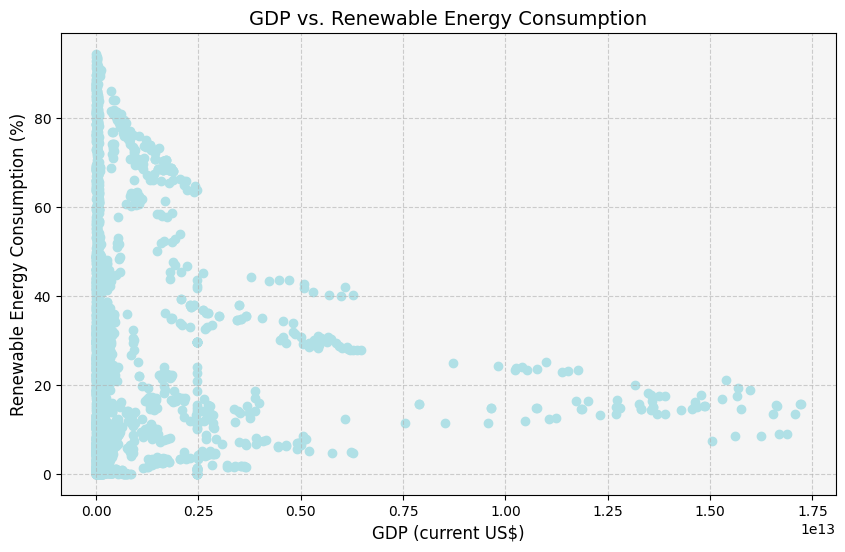

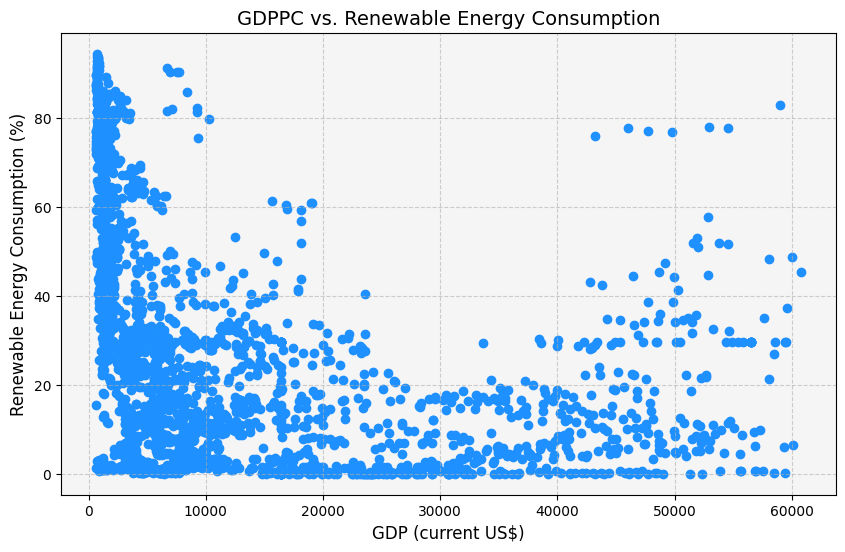

In [ ]:
# Plot GDP vs. Renewable Energy Consumption
plt.figure(figsize=(10, 6))
plt.gca().set_facecolor('whitesmoke')
plt.scatter(all_countries_df['GDP'], all_countries_df['Renewable Energy Consumption'], color='powderblue')
plt.title('GDP vs. Renewable Energy Consumption', fontsize=14)
plt.xlabel('GDP (current US$)', fontsize=12)
plt.ylabel('Renewable Energy Consumption (%)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

# Plot GDPPC vs. Renewable Energy Consumption
plt.figure(figsize=(10, 6))
plt.gca().set_facecolor('whitesmoke')
plt.scatter(all_countries_df['GDPPC'], all_countries_df['Renewable Energy Consumption'], color='dodgerblue')
plt.title('GDPPC vs. Renewable Energy Consumption', fontsize=14)
plt.xlabel('GDP (current US$)', fontsize=12)
plt.ylabel('Renewable Energy Consumption (%)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

Based on the pattern, we thought several variants of regression could be used to model the data:

1.   **Linear Regression**: There are weak but observable linear patterns in the scatter data for GDPPC and GDP vs Renewable Energy. We felt this would be a good baseline regression technique to try.
2.  **Convex / Polynomial Regression**: For GDP vs Renewable Energy in particular we observed a convex shape, and believed that polynomial regression would fit the data well.
3. **Logarithmic Regression**: A lot of the scatter data seems to loosely follow a Logarithmic curve, and so we thought creating a logarithmic regression model was worth trying.

First, we needed to initialize our data to make it ready for use. We set a random state and created the train and test sets for the GDPPC and GDP sets of data. Then, we visualized the train and test data.

In [ ]:
# Declare random state for reproducibility
random_state = 42
np.random.seed(random_state)
test_size = 0.2

# Fnuction to split datset into Train and Test sets
def split_data(X, Y, test_size=test_size, random_state=random_state):
    x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=random_state)
    return x_train, x_test, y_train, y_test

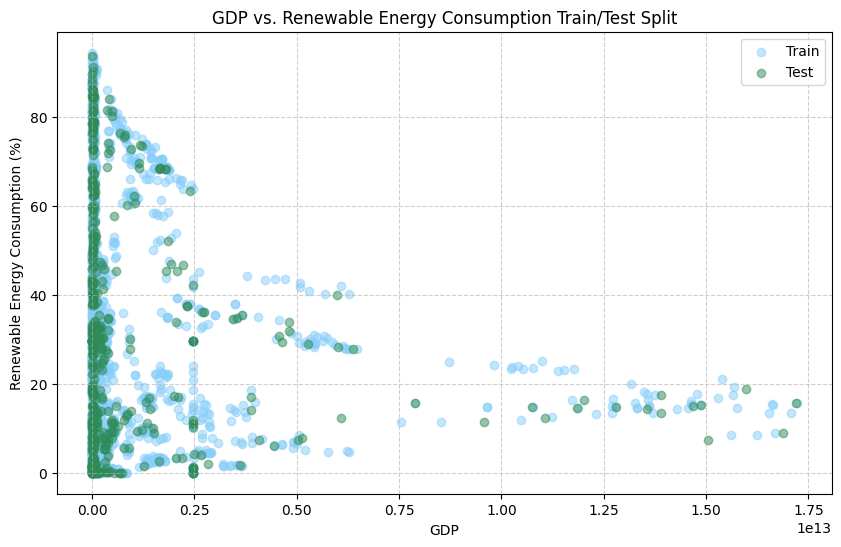

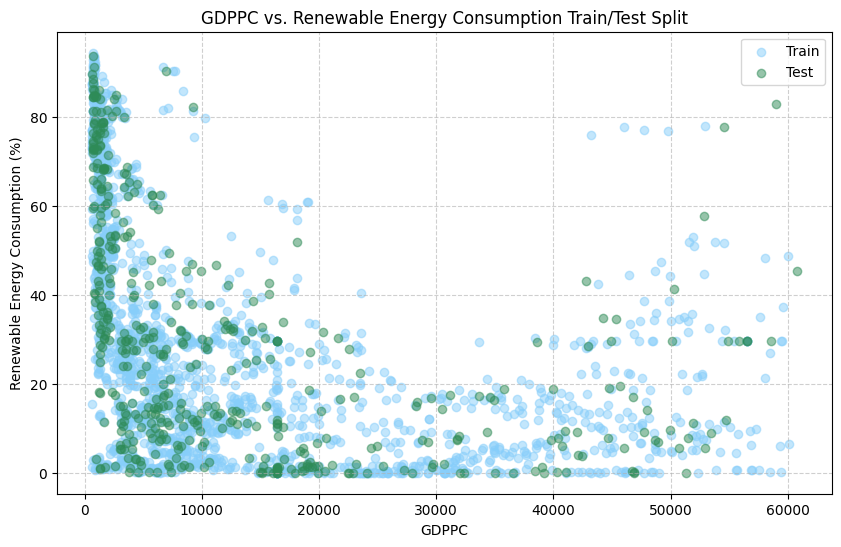

In [ ]:
# Extract GDP, GDPPC, and Renewable Energy Consumption
X_gdp_set = all_countries_df['GDP'].to_numpy().reshape(-1, 1)
X_gdppc_set = all_countries_df['GDPPC'].to_numpy().reshape(-1, 1)
Y_set = all_countries_df['Renewable Energy Consumption'].to_numpy()

# Split GDP and GDPPC into Train and Test sets
X_gdp_train, X_gdp_test, Y_gdp_train, Y_gdp_test = split_data(X_gdp_set, Y_set)
X_gdppc_train, X_gdppc_test, Y_gdppc_train, Y_gdppc_test = split_data(X_gdppc_set, Y_set)

# Function to plot Train and Test sets
def draw_scatter(X_train, Y_train, X_test, Y_test, title, xlabel='Feature', ylabel='Target'):
    plt.figure(figsize=(10, 6))
    plt.scatter(X_train, Y_train, color='lightskyblue', label='Train', alpha=0.5)
    plt.scatter(X_test, Y_test, color='seagreen', label='Test', alpha=0.5)
    plt.title(title)
    plt.xlabel(xlabel)
    if ylabel:
        plt.ylabel(ylabel)
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.show()

# Plot GDP and GDPPC Train and Test sets
draw_scatter(X_gdp_train, Y_gdp_train, X_gdp_test, Y_gdp_test, "GDP vs. Renewable Energy Consumption Train/Test Split", "GDP", "Renewable Energy Consumption (%)")
draw_scatter(X_gdppc_train, Y_gdppc_train, X_gdppc_test, Y_gdppc_test, "GDPPC vs. Renewable Energy Consumption Train/Test Split", "GDPPC", "Renewable Energy Consumption (%)")

Though the test data is a fair representation of the datset as a whole, there is a clear overrepresentation of countries with lower GDPs and GDPPCs and an underrepresentation of countries with higher GDPs and GDPPCs. We kept the skew of our dataset in mind when conducting out analysis.

Next, we defined two functions:

fit_model() fits the model with the data and returns the trained model.

predict_data() uses the newly trained model and predicts a country's renewable energy consumption percentage using the train and test data.

In [ ]:
# Function to fit a Linear Regression model
def fit_model(X_train, Y_train):
    model = LinearRegression()
    model.fit(X_train, Y_train)
    return model

# Function to predict using the specified model
def predict_data(model, X_train, X_test):
    Y_train_pred = model.predict(X_train)
    Y_test_pred = model.predict(X_test)
    return Y_train_pred, Y_test_pred

# Fit and predict Renewable Energy Consumption from GDP
gdp_model = fit_model(X_gdp_train, Y_gdp_train)
Y_gdp_train_pred, Y_gdp_test_pred = predict_data(gdp_model, X_gdp_train, X_gdp_test)

# Fit and predict Renewable Energy Consumption from GDPPC
gdppc_model = fit_model(X_gdppc_train, Y_gdppc_train)
Y_gdppc_train_pred, Y_gdppc_test_pred = predict_data(gdppc_model, X_gdppc_train, X_gdppc_test)

After training and testing the data, we can plot the results.

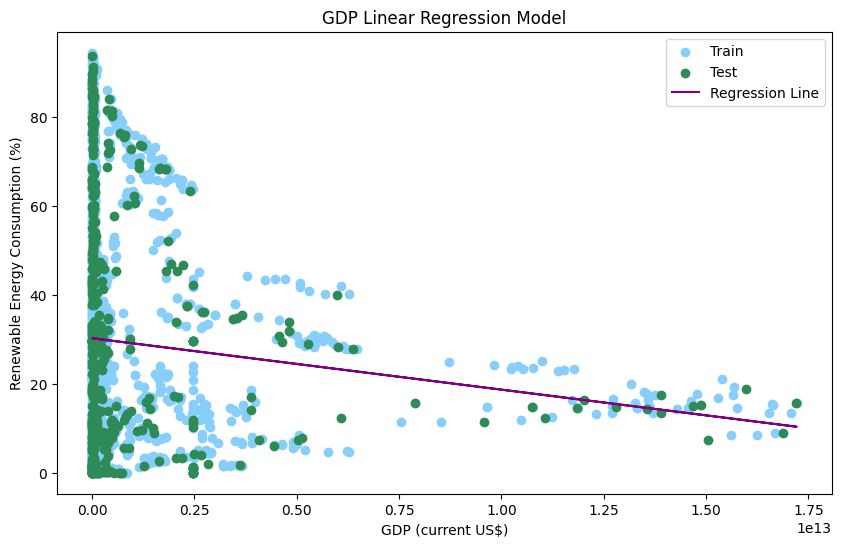

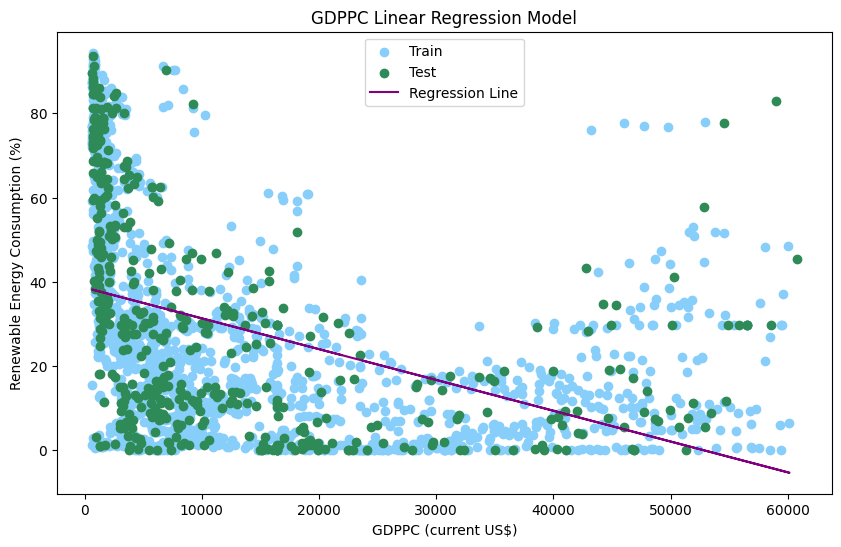

In [ ]:
# Function to plot Train/Test data with Regression model
def draw_scatter_with_regression(X_train, Y_train, X_test, Y_test, Y_train_pred, title, xlabel, ylabel='Renewable Energy Consumption (%)'):
    plt.figure(figsize=(10, 6))
    plt.scatter(X_train, Y_train, color='lightskyblue', label='Train')
    plt.scatter(X_test, Y_test, color='seagreen', label='Test')
    plt.plot(X_train, Y_train_pred, color='purple', label='Regression Line')
    plt.title(title)
    plt.xlabel(xlabel)
    if ylabel:
        plt.ylabel(ylabel)
    plt.legend()
    plt.show()

# Plot GDP Linear Regression model and GDPPC Linear Regression model
draw_scatter_with_regression(X_gdp_train, Y_gdp_train, X_gdp_test, Y_gdp_test, Y_gdp_train_pred, 'GDP Linear Regression Model', 'GDP (current US$)')
draw_scatter_with_regression(X_gdppc_train, Y_gdppc_train, X_gdppc_test, Y_gdppc_test, Y_gdppc_train_pred, 'GDPPC Linear Regression Model', 'GDPPC (current US$)')

For both GDP and GDPPC, the linear regression model finds a weak negative relationship. Though the linear regression model performs slightly better on the GDP data than on the GDPPC data, it is a poor model for both variables. It fails to learn relationships and *severely* underfits.

We further evaluate our model by displaying the MSE and R^2 value.

In [ ]:
# Function to evaluate model performance by calculating MSE and R^2
def evaluate_model(Y_train, Y_train_pred, Y_test, Y_test_pred):
    mse_train = mean_squared_error(Y_train, Y_train_pred)
    mse_test = mean_squared_error(Y_test, Y_test_pred)
    r2_train = r2_score(Y_train, Y_train_pred)
    r2_test = r2_score(Y_test, Y_test_pred)
    return mse_train, mse_test, r2_train, r2_test

# Evaluate GDP Linear Regression model and GDPPC Linear Regression model
mse_gdp_train, mse_gdp_test, r2_gdp_train, r2_gdp_test = evaluate_model(
    Y_gdp_train, Y_gdp_train_pred, Y_gdp_test, Y_gdp_test_pred)
mse_gdppc_train, mse_gdppc_test, r2_gdppc_train, r2_gdppc_test = evaluate_model(
    Y_gdppc_train, Y_gdppc_train_pred, Y_gdppc_test, Y_gdppc_test_pred)

mse_train = [mse_gdp_train, mse_gdppc_train]
mse_test = [mse_gdp_test, mse_gdppc_test]
r2_train = [r2_gdp_train, r2_gdppc_train]
r2_test = [r2_gdp_test, r2_gdppc_test]

for i in range(0,2):
    if i == 0:
      print("Linear Model Performance on GDP Dataset:")
    else:
      print("Linear Model Performance on GDPPC Dataset:")
    print(f"MSE (Train): {mse_train[i]}")
    print(f"MSE (Test): {mse_test[i]}")
    print(f"R^2 (Train): {r2_train[i]}")
    print(f"R^2 (Test): {r2_test[i]}")

Linear Model Performance on GDP Dataset:
MSE (Train): 682.3398544831452
MSE (Test): 672.4811587009934
R^2 (Train): 0.011156413677164467
R^2 (Test): 0.018171976906851905
Linear Model Performance on GDPPC Dataset:
MSE (Train): 571.1436710894942
MSE (Test): 572.0387089074968
R^2 (Train): 0.17230137985487393
R^2 (Test): 0.16481877977918324


As seen from the high MSE and low R^2 values, the Linear regression model seems suboptimal and does not accurately model the data. It seems a polynomial regression model, with more curves and line complexity, would better fit the data.

Thus, we pursued polynomial regression models. We started by training a polynomial regression model with a degree of 3 for the GDP vs Renewable Energy Consumption data. We believed this could adequately model the complex curve of the data.

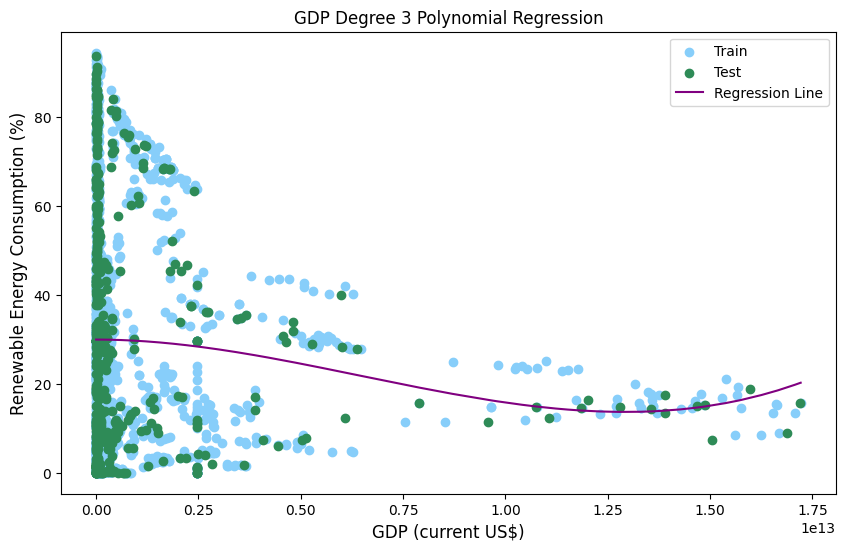

In [ ]:
# Fit Degree 3 Polynomial Regression model to GDP dataset
degree = 3
gdp_model_poly = make_pipeline(PolynomialFeatures(degree), LinearRegression())
gdp_model_poly.fit(X_gdp_train, Y_gdp_train)

# Predict Renewable Energy Consumption from GDP
Y_gdp_train_pred_poly, Y_gdp_test_pred_poly = predict_data(gdp_model_poly, X_gdp_train, X_gdp_test)

# Plot Degree 3 Polynomial Regression model and GDP Train/Test data
sorted_idx = np.argsort(X_gdp_train.ravel())
plt.figure(figsize=(10, 6))
plt.scatter(X_gdp_train, Y_gdp_train, color='lightskyblue', label='Train')
plt.scatter(X_gdp_test, Y_gdp_test, color='seagreen', label='Test')
plt.plot(X_gdp_train[sorted_idx], Y_gdp_train_pred_poly[sorted_idx], color='purple', label='Regression Line')
plt.title('GDP Degree 3 Polynomial Regression')
plt.xlabel('GDP (current US$)', fontsize=12)
plt.ylabel('Renewable Energy Consumption (%)', fontsize=12)
plt.legend()
plt.show()

As seen above, the degree 3 polynomial regression model plots a point of inflection at the median GDP values. The adjacent curves are relatively flat and do a poor job of illustrating the larger decreasing curve for the entire dataset. This may be be due to the overrepresentation of GDPs below the median and the underrepresentation of GDPs above the median. Additionally, the uneven data can affect model's performance by enabling overfitting for countries with higher GDPs and underfitting for countries with lower GDPs.

In [ ]:
# Evaluate Degree 3 Polynomial Regression model for GDP
mse_gdp_train_poly, mse_gdp_test_poly, r2_gdp_train_poly, r2_gdp_test_poly = evaluate_model(
    Y_gdp_train, Y_gdp_train_pred_poly, Y_gdp_test, Y_gdp_test_pred_poly)

print("Degree 3 Polynomial Performance on GDP Dataset:")
print(f"Train - MSE: {mse_gdp_train_poly:.4f}, R^2: {r2_gdp_train_poly:.4f}")
print(f"Test - MSE: {mse_gdp_test_poly:.4f}, R^2: {r2_gdp_test_poly:.4f}\n")

Degree 3 Polynomial Performance on GDP Dataset:
Train - MSE: 683.0556, R^2: 0.0101
Test - MSE: 673.8329, R^2: 0.0162



The R^2 values are extremely low, and even after testing various degree values, we were unable to produce a higher value. This is likely due to the large clustering of values on the left resulting in a lack of ability to accurately model. However, it does appear from observation that the curve is able to adequately model the general pattern of the data.

For the GDPPC vs Renewable Energy Consumption dataset, seeing the parabolic shape of the data, we decided a polynomial regression model with degree 2 could model the data well.

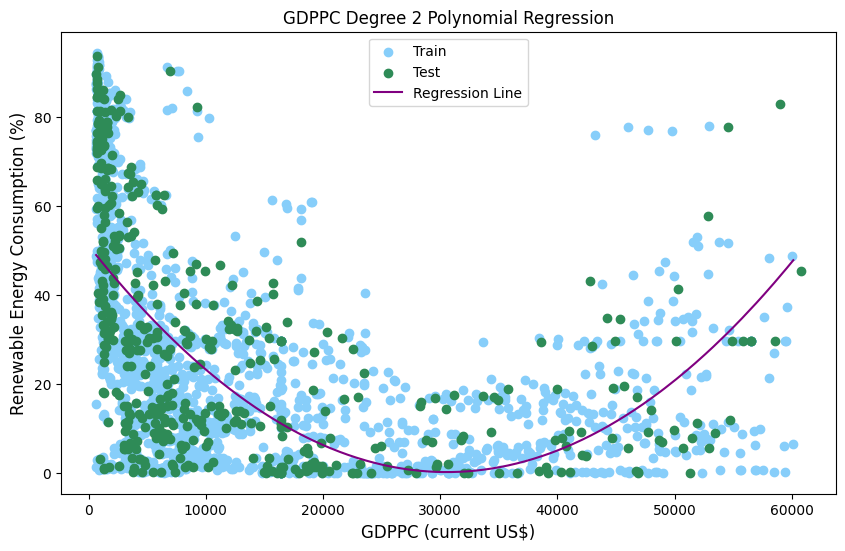

In [ ]:
# Reshape data to fit model
X_gdppc_train = X_gdppc_train.reshape(-1, 1)
X_gdppc_test = X_gdppc_test.reshape(-1, 1)

# Fit Degree 2 Polynomial Regression model to GDPPC dataset
degree = 2
gdppc_model_poly = make_pipeline(PolynomialFeatures(degree), LinearRegression())
gdppc_model_poly.fit(X_gdppc_train, Y_gdppc_train)

# Predict Renewable Energy Consumption from GDPPC
Y_gdppc_train_pred_poly, Y_gdppc_test_pred_poly = predict_data(gdppc_model_poly, X_gdppc_train, X_gdppc_test)

# Plot Degree 2 Polynomial Regression model and GDPPC Train/Test data
sorted_idx = np.argsort(X_gdppc_train.ravel())
plt.figure(figsize=(10, 6))
plt.scatter(X_gdppc_train, Y_gdppc_train, color='lightskyblue', label='Train')
plt.scatter(X_gdppc_test, Y_gdppc_test, color='seagreen', label='Test')
plt.plot(X_gdppc_train[sorted_idx], Y_gdppc_train_pred_poly[sorted_idx], color='purple', label='Regression Line')
plt.title('GDPPC Degree 2 Polynomial Regression')
plt.xlabel('GDPPC (current US$)', fontsize=12)
plt.ylabel('Renewable Energy Consumption (%)', fontsize=12)
plt.legend()
plt.show()

The Degree 2 Polynomial Regression model follows the overarching parabolic shape of the data despite an uneven distribution of data. It can also be seen that the regression line sits at the bottom of the graph. This indicates that acrorss GDPPC values, countries consume minimal renewable energy.

In [ ]:
# Evaluate Degree 2 Polynomial Regression model for GDPPC
mse_gdppc_train_poly, mse_gdppc_test_poly, r2_gdppc_train_poly, r2_gdppc_test_poly = evaluate_model(
    Y_gdppc_train, Y_gdppc_train_pred_poly, Y_gdppc_test, Y_gdppc_test_pred_poly)

print("Degree 2 Polynomial Performance on GDPPC Dataset:")
print(f"Train - MSE: {mse_gdppc_train_poly:.4f}, R^2: {r2_gdppc_train_poly:.4f}")
print(f"Test - MSE: {mse_gdppc_test_poly:.4f}, R^2: {r2_gdppc_test_poly:.4f}\n")

Degree 2 Polynomial Performance on GDPPC Dataset:
Train - MSE: 436.1554, R^2: 0.3679
Test - MSE: 406.2438, R^2: 0.4069



The R^2 values are moderate, indicating a decent fit with the data. From an observational standpoint the regression line does follow the pattern in the data. To build a stronger model, more data may be needed.

To better model the relationship between GDP and Renewable Energy Consumption, we attempted a logarithmic decay regression model. This model was chosen as the the data displays a decreasing curve. However, the slope was not steep enough to be exponential and thus logarithmic decay was chosen.

To identify the optimal hyperparameters, we utilized gradient descent. In this model, the hyperparameramters are a and b, the coefficients to the logarithmic equation: alog(x) + b. To monitor the model's performance, we plotted the loss for each set of hyperparameters. Additionally, we normalized the GDP values (1) because they were so large and (2) to better fit the model.

Additional Resources:
*   https://www.statology.org/logarithmic-regression-python/
*   https://bowtiedraptor.substack.com/p/log-linear-model



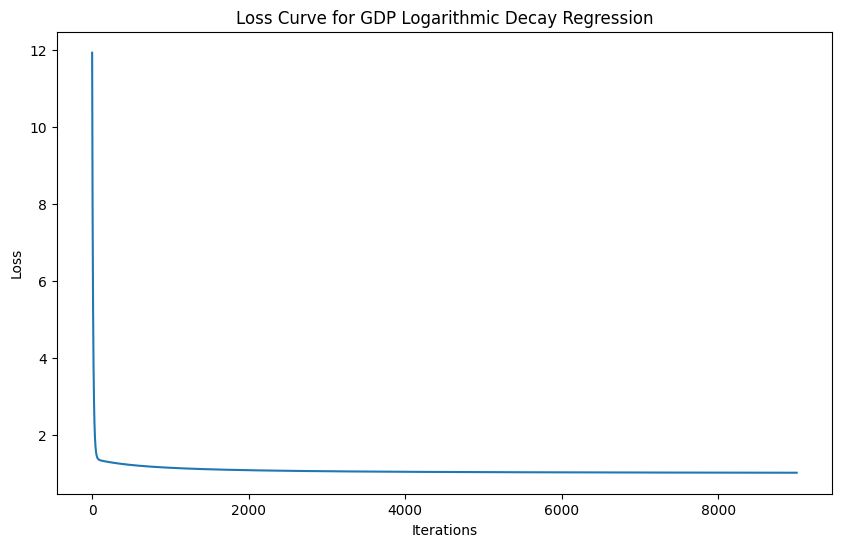

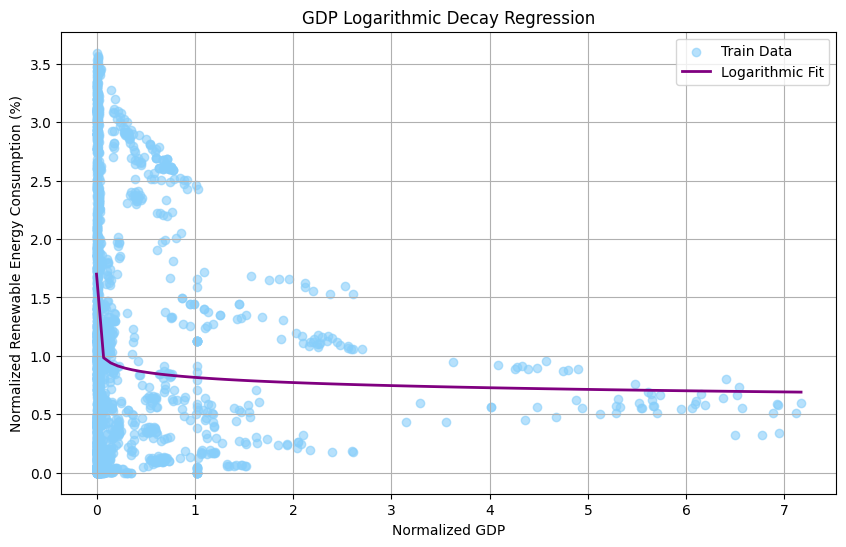

Optimized coefficients: [-0.06394265  0.81572015]


In [ ]:
# Logarithmic Decay Regression to model GDP vs. Renewable Energy Consumption
class LogarithmicDecayRegression:
    # Initializes the regression model with learning rate and decay rate.
    def __init__(self, learning_rate, iterations, decay_rate):
        self.learning_rate = learning_rate
        self.iterations = iterations
        self.decay_rate = decay_rate
        self.coefficients = None

    # Generate logarithmic features for input X
    def _log_features(self, X):
        return np.vstack([np.log(X), np.ones_like(X)]).T

    # Fit the logarithmic decay regression model to the data
    def fit(self, X, Y):
        X_log = self._log_features(X)
        self.coefficients = np.random.randn(X_log.shape[1])  # Initialize coefficients (a, b)
        n = len(X)
        losses = []

        for i in range(self.iterations):
            # Prediction
            Y_pred = X_log @ self.coefficients

            # Compute loss (Mean Squared Error)
            loss = np.mean((Y - Y_pred) ** 2)
            losses.append(loss)

            # Compute gradients (w.r.t. a and b)
            gradients = (-2 / n) * X_log.T @ (Y - Y_pred)

            # Apply decay to the learning rate and update the learning rate
            adjusted_learning_rate = self.learning_rate / (1 + self.decay_rate * i)

            # Update coefficients using the adjusted learning rate
            self.coefficients -= adjusted_learning_rate * gradients

        # Plot the loss curve
        plt.figure(figsize=(10, 6))
        plt.plot(losses)
        plt.xlabel("Iterations")
        plt.ylabel("Loss")
        plt.title("Loss Curve for GDP Logarithmic Decay Regression")
        plt.show()

    # Predict Renewable Energy Consumption using Logarithmic Decay model
    def predict(self, X):
        X_log = self._log_features(X)
        return X_log @ self.coefficients

# Plot Logarithmic Decay Regression and GDP Train/Test data
def plot_regression_line(model, X, Y):
    X_range = np.linspace(X.min(), X.max(), 100)
    X_range = X_range[X_range > 0]
    Y_pred = model.predict(X_range)

    plt.figure(figsize=(10, 6))
    plt.scatter(X, Y, color='lightskyblue', alpha=0.6, label='Train Data')
    plt.plot(X_range, Y_pred, color='purple', label='Logarithmic Fit', linewidth=2)
    plt.title('GDP Logarithmic Decay Regression')
    plt.ylabel('Normalized Renewable Energy Consumption (%)')
    plt.xlabel('Normalized GDP')
    plt.legend()
    plt.grid(True)
    plt.show()

# Normalize train and test sets since GDP is so large
X_gdp_train_normalized = (X_gdp_train - np.mean(X_gdp_train)) / np.std(X_gdp_train)
Y_gdp_train_normalized = (Y_gdp_train - np.mean(Y_gdp_train)) / np.std(Y_gdp_train)
X_gdp_test_normalized = (X_gdp_test - np.mean(X_gdp_test)) / np.std(X_gdp_test)
Y_gdp_test_normalized = (Y_gdp_test - np.mean(Y_gdp_test)) / np.std(Y_gdp_test)

# Add a constant to ensure all values are greater than 0 since taking log
X_gdp_train_normalized += abs(X_gdp_train_normalized.min()) + 1e-6
Y_gdp_train_normalized += abs(Y_gdp_train_normalized.min()) + 1e-6
X_gdp_test_normalized += abs(X_gdp_test_normalized.min()) + 1e-6
Y_gdp_test_normalized += abs(Y_gdp_test_normalized.min()) + 1e-6

# Flatten data to fit model
X_gdp_train_normalized = X_gdp_train_normalized.flatten()
Y_gdp_train_normalized = Y_gdp_train_normalized.flatten()
X_gdp_test_normalized = X_gdp_test_normalized.flatten()
Y_gdp_test_normalized = Y_gdp_test_normalized.flatten()

# Instantiate the logarithmic decay model and fit the data
log_model = LogarithmicDecayRegression(learning_rate=0.001, iterations=9000, decay_rate=0.001)
log_model.fit(X_gdp_train_normalized, Y_gdp_train_normalized)

# Plot the fitted regression line
plot_regression_line(log_model, X_gdp_train_normalized, Y_gdp_train_normalized)
print("Optimized coefficients:", log_model.coefficients)

Loss is quickly minimized using the logarithmic decay model. The regression line shows a steep curve rather than a smooth curve near the minimum GDP and an almost horizontal line across the rest of the data. Again, this is likely due to the prevalence of countries with GDPs below the median value and the scarcity of countries with GDPs above the median value.  

In [ ]:
# Predict Renewable Energy Consumption from GDP using Logarithmic Decay
Y_gdp_train_pred = log_model.predict(X_gdp_train_normalized)
Y_gdp_test_pred = log_model.predict(X_gdp_test_normalized)

# Evaluate Logarithmic Decay Regression model for GDP
mse_gdp_train, mse_gdp_test, r2_gdp_train, r2_gdp_test = evaluate_model(
    Y_gdp_train_normalized, Y_gdp_train_pred, Y_gdp_test_normalized, Y_gdp_test_pred)

print("Logarithmic Decay Model Performance on GDP Dataset:")
print(f"MSE (Train): {mse_gdp_train}, R^2 (Train): {r2_gdp_train}")
print(f"MSE (Test): {mse_gdp_test}, R^2 (Test): {r2_gdp_test}")

Logarithmic Decay Model Performance on GDP Dataset:
MSE (Train): 1.0081880326907784, R^2 (Train): -0.008188032690778613
MSE (Test): 1.0090816992087963, R^2 (Test): -0.009081699208796312


The negative r^2 values indicate the model cannot explain any variance between the variables and is an ultimately poor choice. Through this process, we have learned not to underestimate how the distribution of data can heavily affect a model's performance even when a supposedly larger relationship is evident.

To better model the relationship between GDPPC and Renewable Energy Consumption, we attempted a convex regression model using gradient descent. This model was chosen as the the data displays a parabolic shape.

To identify the optimal hyperparameters, we utilized gradient descent. In this model, the hyperparameramters are a, b, and c, the coefficients to the quadratic equation: ax^2 + bx + c. To monitor the model's performance, we plotted the loss for each set of hyperparameters. Additionally, we normalized the GDPPC values (1) because they were so large and (2) to better fit the model.

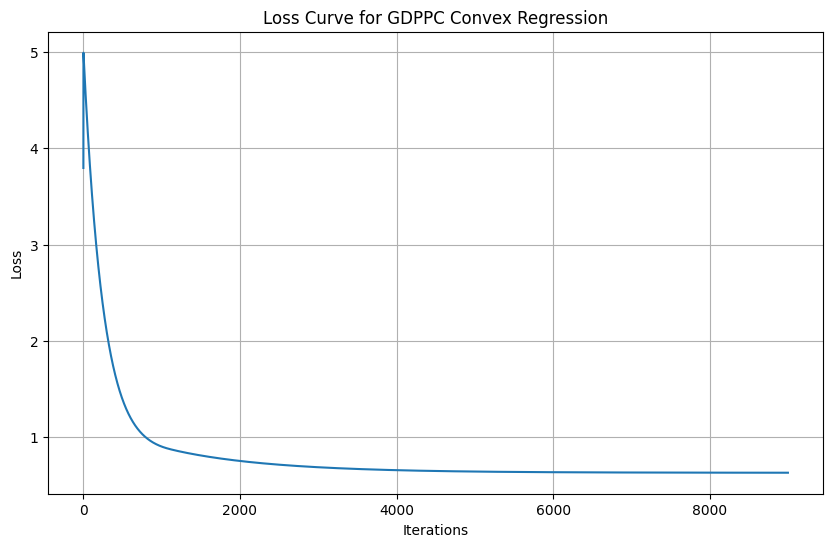

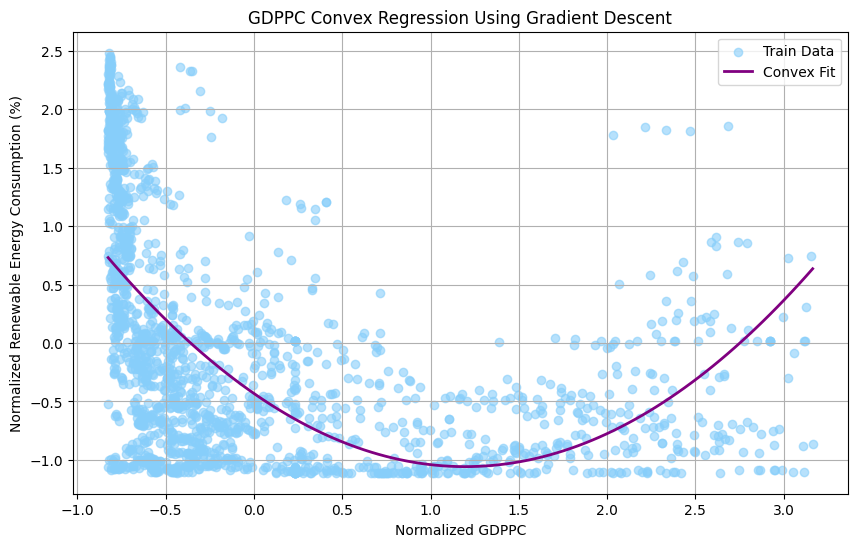

Coefficients: [-0.43171469 -1.04627537  0.43724738]


In [ ]:
# Conves Regression to model GDPPC vs. Renewable Energy Consumption
class ConvexRegression:
    def __init__(self, degree, learning_rate, iterations):
        self.degree = degree
        self.learning_rate = learning_rate
        self.iterations = iterations
        self.coefficients = None

    # Generate polynomial features for input X
    def _polynomial_features(self, X):
        return np.vstack([X**i for i in range(self.degree + 1)]).T

    # Fit the convex regression model to the data
    def fit(self, X, Y):
        X_poly = self._polynomial_features(X)
        self.coefficients = np.random.randn(X_poly.shape[1])
        n = len(X)
        losses = []

        for _ in range(self.iterations):
            Y_pred = X_poly @ self.coefficients
            loss = np.mean((Y - Y_pred) ** 2)
            losses.append(loss)

            # Compute gradients
            gradients = (-2 / n) * X_poly.T @ (Y - Y_pred)
            self.coefficients -= self.learning_rate * gradients
            self.coefficients[2] = max(0, self.coefficients[2])

        # Plot the loss curve
        plt.figure(figsize=(10, 6))
        plt.plot(losses)
        plt.xlabel("Iterations")
        plt.ylabel("Loss")
        plt.title("Loss Curve for GDPPC Convex Regression")
        plt.grid(True)
        plt.show()

    # Predict Renewable Energy Consumption using Convex model
    def predict(self, X):
        X_poly = self._polynomial_features(X)
        return X_poly @ self.coefficients

# Plot Convex Regression and GDPPC Train/Test data
def plot_regression_line(model, X, Y):
    X_range = np.linspace(X.min(), X.max(), 100)  # 100 evenly spaced points
    Y_pred = model.predict(X_range)

    plt.figure(figsize=(10, 6))
    plt.scatter(X, Y, color='lightskyblue', alpha=0.6, label='Train Data')
    plt.plot(X_range, Y_pred, color='purple', label='Convex Fit', linewidth=2)  # Adjust `linewidth`
    plt.title('GDPPC Convex Regression Using Gradient Descent')
    plt.xlabel('Normalized GDPPC')
    plt.ylabel('Normalized Renewable Energy Consumption (%)')
    plt.legend()
    plt.grid(True)
    plt.show()

# Normalize train and test set since GDPPC is large
X_gdppc_train_normalized = (X_gdppc_train - np.mean(X_gdppc_train)) / np.std(X_gdppc_train)
Y_gdppc_train_normalized = (Y_gdppc_train - np.mean(Y_gdppc_train)) / np.std(Y_gdppc_train)
X_gdppc_test_normalized = (X_gdppc_test - np.mean(X_gdppc_test)) / np.std(X_gdppc_test)
Y_gdppc_test_normalized = (Y_gdppc_test - np.mean(Y_gdppc_test)) / np.std(Y_gdppc_test)

# Flatten data to fit model
X_gdppc_train_normalized = X_gdppc_train_normalized.flatten()
Y_gdppc_train_normalized = Y_gdppc_train_normalized.flatten()
X_gdppc_test_normalized = X_gdppc_test_normalized.flatten()
Y_gdppc_train_normalized = Y_gdppc_train_normalized.flatten()

# Instantiate the convex model and fit the data
convex_model = ConvexRegression(degree=2, learning_rate=0.001, iterations=9000)
convex_model.fit(X_gdppc_train_normalized, Y_gdppc_train_normalized)

# Plot the fitted regression line
plot_regression_line(convex_model, X_gdppc_train_normalized, Y_gdppc_train_normalized)
print("Coefficients:", convex_model.coefficients)

Though the Convex Regression model through gradient descent produces results very similar to the degree 2 polynomial, there are slight differences. Specifically, the ends curve at a slightly steeper angle. This illustrates the power of repeated iterations for choosing hyperparameters.

In [ ]:
# Predict Renewable Energy Consumption from GDPPC using Convex Regression
Y_gdppc_train_normalized_pred, Y_gdppc_test_normalized_pred = predict_data(convex_model, X_gdppc_train_normalized, X_gdppc_test_normalized)

# Evaluate Convex Regression model for GDPPC
mse_gdppc_train_convex, mse_gdppc_test_convex, r2_gdppc_train_convex, r2_gdppc_test_convex = evaluate_model(
    Y_gdppc_train_normalized, Y_gdppc_train_normalized_pred, Y_gdppc_test_normalized, Y_gdppc_test_normalized_pred)

print("Convex Model Performance on GDPPC Dataset")
print(f"Test - MSE: {mse_gdppc_train_convex}, R^2: {r2_gdppc_train_convex}")
print(f"Test - MSE: {mse_gdppc_test_convex}, R^2: {r2_gdppc_test_convex}")

Convex Model Performance on GDPPC Dataset
Test - MSE: 0.6326887162791922, R^2: 0.3673112837208078
Test - MSE: 0.5935337806988121, R^2: 0.40646621930118787


Interestingly, the r^2 value for the degree 2 polynomial value was 0.4069 while the R^2 value for the Convex regression model through gradient descent was 0.4064. This suggests that the Convex regression model may have begun to overfit  countries with higher GDPPCs in which there were fewer data points, as it was unable to explain variance as well. The siginficantly smaller MSE reflects the normalization of data

Given our unevenly distributed dataset, our model moderately predicts renewable energy consumption given a country‚Äôs GDPPC. They fail to accurately predict renewable energy consumption given a country‚Äôs GDP. This is likely due to the fact that GDPPC is a much better indication of quality of life than GDP. Future research will benefit from additional data.

Still, our model accurately reflects the underconsumption of renewable energy across all GDP and GDPPC values, indicating a need for more policies enforcing sustainable practices. An interesting takeaway from our analysis is that countries with median values for GDP and GDPPC were the least likely to have a high percentage of consumption of renewable energy.  One may naively assume that the more affluent a country, the more ethical practices it adopts, but our data suggests that emerging economies‚Äîones often going through industrial revolutions‚Äîare the least likely to consume renewable energy.

# **Visualizations**

We use the data points used in the scatter plot representation of the data to fit a convex regression using gradient descent in the above section. \\
The points range from GDP per capita of \$0-\$60,0000. \\
We visualized our data by spliting the range evenly into 3 groups, marking low, medium, and high GDP per capita groups. Each grouping had a range of \$20,000. \\
This visualization helps us observe the overall trends in renewable energy consumption across countries of varying GDPs per capita. \\
It is important to note that low-income low-GDP per capita countries seem to be overrepresented. This is because there are many more countries with a low GDP per capita. We attempted to normalize the data so that there would be a more even distrubtion (otherwise the medium and high GDP countries appear almost non-existent), which is why our axis is Density / Normalized Frequency.

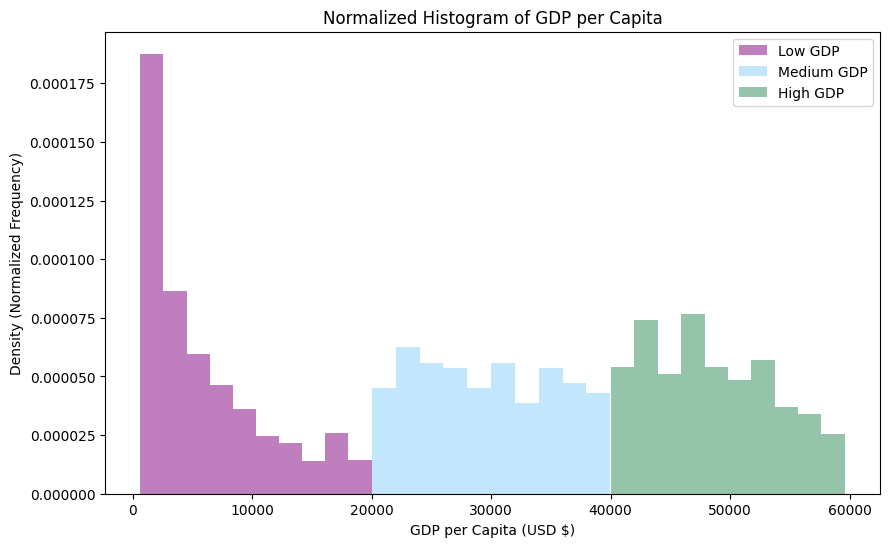

In [ ]:
# Range boundaries for low, medium, and high GDP as lower third, middle, and high
low_threshold = 20000    # Low GDP: 0 to 20,000
high_threshold = 40000   # Medium GDP: 20,001 to 40,000
max_gdp = 60000          # High GDP: 40,001 to 60,000
# Split the data into three categories based on GDP ranges
low_gdp_train = X_gdppc_train[(X_gdppc_train >= 0) & (X_gdppc_train <= low_threshold)]
med_gdp_train = X_gdppc_train[(X_gdppc_train > low_threshold) & (X_gdppc_train <= high_threshold)]
high_gdp_train = X_gdppc_train[(X_gdppc_train > high_threshold) & (X_gdppc_train <= max_gdp)]

plt.figure(figsize=(10, 6))

# Plot low GDP with normalization
plt.hist(low_gdp_train, bins=10, alpha=0.5, label='Low GDP', color='purple', density=True)

# Plot medium GDP with normalization
plt.hist(med_gdp_train, bins=10, alpha=0.5, label='Medium GDP', color='lightskyblue', density=True)

# Plot high GDP with normalization
plt.hist(high_gdp_train, bins=10, alpha=0.5, label='High GDP', color='seagreen', density=True)
plt.title('Normalized Histogram of GDP per Capita')
plt.xlabel('GDP per Capita (USD $)')
plt.ylabel('Density (Normalized Frequency)')
plt.legend()
plt.show()

The World Bank Group has classifications of Low, Middle, and High income countries based on their GDPs per capita (https://www.worldbank.org/en/country/mic/overview). They are as follows:


Low-Income Economy: \$1,135 or less


Middle-Income Economy: \$1,356 or more AND \$13,845 or less


High-Income Economy: \$13,846 or more


Using World Bank Group's GDP per capita classifications, we get a slightly different representation of the data. However, the general shape of the data looks about the same.

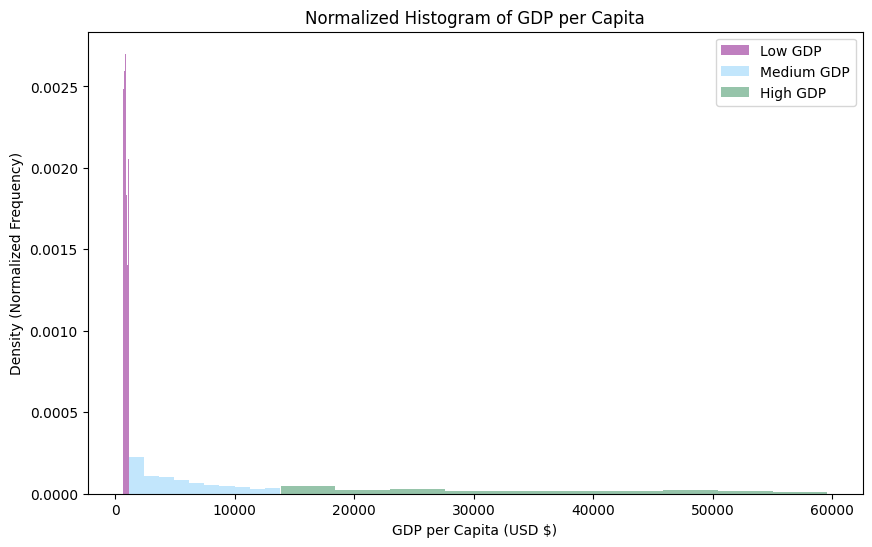

In [ ]:
# range boundaries for low, medium, and high GDP as lower third, middle, and high
low_threshold = 1135
high_threshold = 13846
max_gdp = 60000
# Split the data into three categories based on GDP ranges
low_gdp_train = X_gdppc_train[(X_gdppc_train >= 0) & (X_gdppc_train <= low_threshold)]
med_gdp_train = X_gdppc_train[(X_gdppc_train > low_threshold) & (X_gdppc_train <= high_threshold)]
high_gdp_train = X_gdppc_train[(X_gdppc_train > high_threshold) & (X_gdppc_train <= max_gdp)]

plt.figure(figsize=(10, 6))

# Plot low GDP with normalization
plt.hist(low_gdp_train, bins=10, alpha=0.5, label='Low GDP', color='purple', density=True)

# Plot medium GDP with normalization
plt.hist(med_gdp_train, bins=10, alpha=0.5, label='Medium GDP', color='lightskyblue', density=True)

# Plot high GDP with normalization
plt.hist(high_gdp_train, bins=10, alpha=0.5, label='High GDP', color='seagreen', density=True)
plt.title('Normalized Histogram of GDP per Capita')
plt.xlabel('GDP per Capita (USD $)')
plt.ylabel('Density (Normalized Frequency)')
plt.legend()
plt.show()

# **Insights and Conclusions**

From our modeling we can come to several conclusions about the relationship between GDP / GDPCC and Renewable Energy Consumption.


*   First, the GDP vs Renewable Energy Consumption regression model shows that GDP overall seems to have a slight inverse relationship with Renewable Energy Consumption (i.e. as GDP increases, Renewable Energy Consumption seems to decrease).
*   Second, the GDPPC vs Renewable Energy Consumption regression model shows a positive parabolic relationship between GDPPC and Renewable Energy Consumption. This implies a high proportion of renewable energy consumption for countries with low GDPPC as well as high GDPPC, but a low proportion of renewable energy consumption for countries with median GDPs. This is an intruiging trend that merits looking into further.

Answering the questions posed above:
*   Do developed countries consume more renewable energy than developing countries?
    
    **Though developed economies have more resources available to them, they do not always consume more renewable energy than developing economies. Often, however, they consume more renewable energy than emerging economies.**
*   Does a country's percentage of arable land influence its GDP?

    **There is an inverse relationship between arable land and a country's GDPPC, specifically countries with large amounts of arable land tend to have lower GDPPC. Still, there is much overlap.**
*   What economy ‚Äî developing, emerging, or developed ‚Äî obtains the largest natural resource rents?

    **Developing economies, by far, obtain the largest natural resource rents, indicating a lack of reliance on industrial services.**
*   Can we predict a country's consumption of nonrenewable energy from its GDP or GDPPC?

    **It is diffcult to predict a country's consumption of nonrenewable energy from its GDPPC and even more so from its GDP. However, one can predict an emerging economy will consume less renewable energy on average than a developing or developed economy.**
*   Is it economcially advantageous for a country to be environmentally friendly?

    **We cannot answer whether or not being environmentally friendly can be economically advantageous for a country. However, depending on the development status of a country, being environmentally friendly can be economically disadvantageous. This is because emerging economies often have to go through industrial revolutions to become wealthier and disregard environmental practices in the process.**


Overall, this analysis can benefit economists and policymakers. The relationship between GDP and Renewable energy consumption can guide policymakers to make better decisions while juggling both economic growth as well as environmental health.

If we were to further conduct research, we would like to analyze the underlying factors behind why GDP and Renewable Energy Consumption displays these trends, and observe how other variables connect in relation to the two features we studied.